In [1]:
import collections
import functools
from imposm.parser import OSMParser
import itertools
from IPython.display import HTML
import json
from matplotlib import collections as mc
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from numpy import nan
import numpy as np
import pandas as pd
import pyproj
import requests
import scipy as sp
import rtree
import seaborn as sb
from scipy import signal
# import shapely
import shapely.geometry
%pylab inline

import data_munging

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Project Pavement

## Measurement of Street Quality by Citizens

<br>
<br>


Zane Blanton



# Pain Points

![img](http://1.bp.blogspot.com/-lQ3fB4MwTMo/UauRa1SW-4I/AAAAAAAACNg/oBj8WrG0rvs/s1600/2000Lincoln.JPG)

![img](https://farm4.staticflickr.com/3946/15515597589_c4740a7332_z.jpg)

![img](http://farm9.staticflickr.com/8222/8345410894_305bdca2bd.jpg)

![img](http://3.bp.blogspot.com/-Y_60FSfqAbY/URhiDomtgKI/AAAAAAAAC0k/InNNLwTCVeo/s1600/036.JPG)

# Point of Indifference

![img](https://assets.dnainfo.com/generated/chicago_photo/2015/08/new-bike-lanes-milw-2-1441035841.jpg/extralarge.jpg)

# Pleasure Points

![img](http://3.bp.blogspot.com/-_Helgvgc7rw/UiTRDVnChzI/AAAAAAAACds/Xsn-x82at3Q/s1600/Ashland.JPG)

![img](http://farm6.staticflickr.com/5502/10539896805_77027f8716.jpg)

![img](http://farm4.staticflickr.com/3798/10540127593_d96857a598.jpg)

# Why should citizens measure infrastructure?

![img](../dat/pix_for_presentation/Flintwater.jpg)

# And Yes We Are 


__"a group of thousands of designers, academic researchers, data journalists, activists, policy wonks, web developers and curious citizens who want to make our city more just, equitable, transparent and delightful to live in through data, design and technology."__

[![chi hack logo][2]][1]

  [1]: http://chihacknight.org/
  [2]: http://chihacknight.org/images/logo/logo.png 


In [14]:
HTML('<iframe src="http://chihacknight.org/" width=800 height=400></iframe>')

In [17]:
HTML('<iframe src="http://project-pavement.herokuapp.com/" width=800 height=400></iframe>')


# Empower the People!

- Open data for individual cyclists and planner
  -- Show road quality by 
  data journalism
  routing
  corridor planning
  road resurfacing
-- anyone can take our code and measure pavement quality in their cities
-- can extend our apps to gather more data

In [10]:
rides, readings = data_munging.read_raw_data()
raw_reading = readings.loc[0, :]
# This is here temporarily both to create a static dataset and because
# some of the newer android readings are bogus and need to be removed.
rides = rides.loc[rides['created_at'] < '2016-03-01', :]
readings = readings.loc[readings['created_at'] < '2016-03-01', :]
n, p = readings.shape

# Data Collection



![img](../dat/pix_for_presentation/bibsy_with_phone_mount.jpg)

# Data Collection



![img](../dat/pix_for_presentation/bibsy_with_phone_mount_circled.jpg)

# Servers

![img](../dat/pix_for_presentation/architecture_for_pbr.png)

# Data Description

Every second we collect lat/lon and 100 readings from _x_, _y_, and _z_ axes



In [11]:
raw_reading

id                                                             5611
created_at                               2015-10-22 23:12:41.285151
updated_at                               2015-10-27 21:13:49.066056
start_lat                                                   41.8968
start_lon                                                  -87.6342
end_lat                                                     41.8967
end_lon                                                    -87.6342
acceleration_x    ---\n- 0.0809326171875\n- 0.171295166015625\n-...
acceleration_y    ---\n- -0.6805877685546875\n- -0.6985168457031...
acceleration_z    ---\n- -0.207244873046875\n- -0.50392150878906...
angle_x                                                     1.59645
angle_y                                                     2.48285
angle_z                                                     2.16167
ride_id                                                          41
start_time                                      

In [20]:
axis = 'z'
sample_size = 10
random_indices = np.random.choice(readings.index, sample_size)
colors = []

In [18]:
readings = data_munging.clean_readings(readings)
readings = data_munging.add_proj_to_readings(readings, data_munging.NAD83)

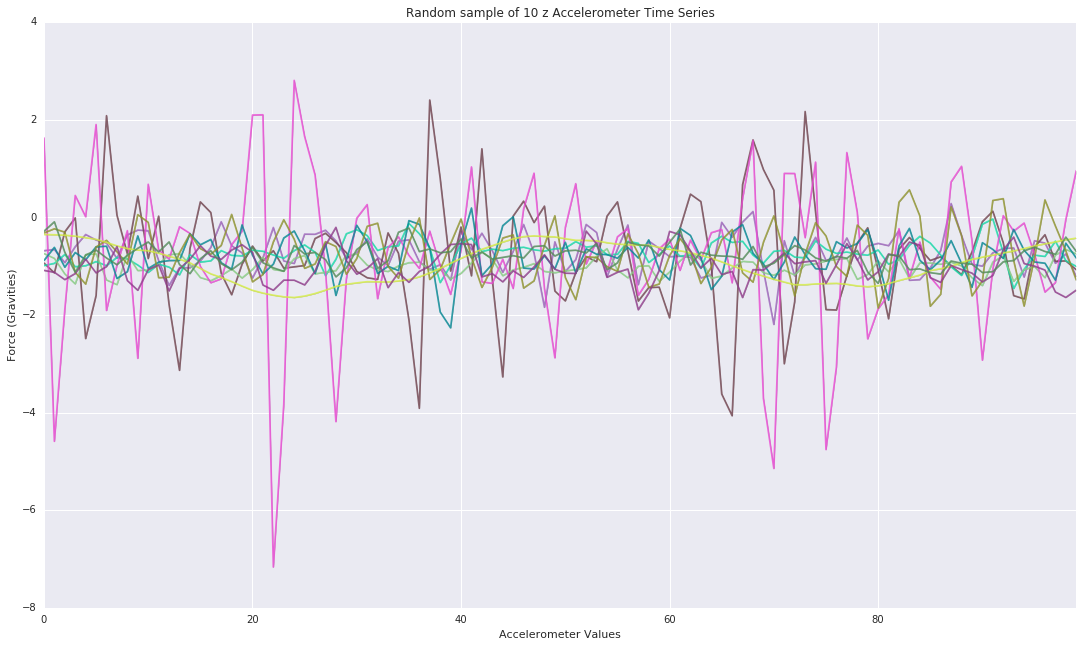

In [21]:
# Visualization of Accelerometer Time Series
for i in random_indices:
    colors.append(np.random.random(3))
    sb.tsplot(readings['num_accel_' + axis][i][0:100], alpha=0.8, color=colors[-1])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Accelerometer Values')
plt.ylabel('Force (Gravities)')
plt.title('Random sample of ' + str(sample_size) + ' ' + axis + ' Accelerometer Time Series')
plt.show()

# Accelerometer Data on a Map

![img](../dat/pix_for_presentation/chi_pavement_screenshot)
http://project-pavement.herokuapp.com/map/chi

# What to do with Fourier Series?

- Could filter out the high frequency components as noise? 
- Could try to back out pavement quality by modeling the bicycle/cyclist system as an FIR?
- Could determine the most subjectively unpleasant frequencies and model those?


__I couldn't find anything practical to do with these.__

# Data Notes

- Data is sampled at 100Hz
- Z access is measured with respect to the phone and 

# My Analysis
1. Project lat/lon endpoints to x/y coordinates.
2. Store all x/y coordinates in a spatial data structure
3. For each reading, find all other readings that are "close to it"
4. Compare candidate "roughness" measures and see if they agree

__Hypothesis:__ A good measure of roughness will have a high correlation for readings that are spatially close.

In [ ]:
readings_idx = data_munging.insert_readings_rtree(readings)

In [8]:
sample_size = 1000
indices = np.random.choice(n, sample_size)
for axis in ['z']:
    for i in indices:
        f, Pxx_den = signal.periodogram(readings['num_accel_' + axis][i][0:100])b
        plt.plot(f, Pxx_den, alpha=0.5)
        plt.title('Power Spectrum for ' + axis + ' axis')
        plt.xlabel('frequency [Hz]')
        plt.ylabel('Power Spectrum Density')
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.show()

SyntaxError: invalid syntax (<ipython-input-8-54bcfd4dc2e5>, line 5)

In [ ]:
# Use a threshold for 0.4

def calc_reading_diffs(reading0, reading1):
    start0 = reading0[['start_x', 'start_y']].values
    start1 = reading1[['start_x', 'start_y']].values
    end0 = reading0[['end_x', 'end_y']].values
    end1 = reading1[['end_x', 'end_y']].values
    diff0 = np.linalg.norm(start0 - start1) + np.linalg.norm(end0 - end1)
    diff1 = np.linalg.norm(start0 - end1) + np.linalg.norm(end0 - start1)
    diff = min(diff0, diff1)
    dist0 = np.linalg.norm(start0 - end0)
    dist1 = np.linalg.norm(start1 - end1)
    if dist0 == 0 or dist1 == 0:
        return np.inf
    return diff / (dist0 + dist1)

In [ ]:
total_intersections = []
for sample_in in range(100):
    random_idx, random_point = data_munging.select_random_point(readings)
    random_bb = data_munging.point_to_bb(*random_point, side_length=0.2)
    intersecting_segments = list(readings_idx.intersection(random_bb))
    intersecting_segments = [i for i in intersecting_segments if data_munging.calc_reading_diffs(readings.ix[i, :], readings.ix[random_idx, :]) < 0.5]
    if len(intersecting_segments) > 1:
        for i in intersecting_segments:
            plt.plot([readings.ix[i, 'start_x'], readings.ix[i, 'end_x']],
                     [readings.ix[i, 'start_y'], readings.ix[i, 'end_y']],
                    alpha=0.5)
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        plt.title('Intersections of ' + str(intersecting_segments))
        plt.show()

In [ ]:
total_data_points = 0
total_tries = 0
examined_ids = set()
ids0 = list()
ids1 = list()
while total_data_points < 5000 and total_tries < 100000:
    total_tries += 1
    random_idx, random_point = data_munging.select_random_point(readings)
    random_bb = data_munging.point_to_bb(*random_point, side_length=0.2)
    intersecting_segments = list(readings_idx.intersection(random_bb))
    intersecting_segments = set([i for i in intersecting_segments if data_munging.calc_reading_diffs(readings.ix[i, :], readings.ix[random_idx, :]) < 0.4])
    intersecting_segments.difference_update(examined_ids)
    examined_ids.update(intersecting_segments)
    if intersecting_segments > 1:
        for idx_pair in itertools.combinations(intersecting_segments, 2):
            ids0.append(idx_pair[0])
            ids1.append(idx_pair[1])
            total_data_points += 1

In [ ]:
pairwise_comps = pd.DataFrame({'id0': ids0, 'id1': ids1})
for i in ('0', '1'):
    for var in ('std_z', 'gps_speed', 'abs_mean_total'):
        pairwise_comps[var + i] = readings[var][pairwise_comps['id' + i]].values
for i in ('0', '1'):
    pairwise_comps['abs_mean_over_speed' + i] = pairwise_comps['abs_mean_total' + i] /  pairwise_comps['gps_speed' + i]

# Who am I?

Zane Blanton, a data scientist at Tempus (formerly at Allstate) and a bicycle commuter.

![img](http://www.tempus.com/wp-content/themes/tempus-theme/images/logo.png)

# Icy Roads
![img](http://www.streetsblog.org/wp-content/uploads/2011/01/wintry_biking.jpg)

# Goal

Get a measure of pavement quality and an idea of this measure's accuracy all for road segments as defined in Open Street Map

# Construction on Roads

![img](https://farm4.staticflickr.com/3946/15515597589_c4740a7332_z.jpg)

# Here's how I get to work

![img](../dat/pix_for_presentation/home_to_work_google_map)
https://www.google.com/maps/dir/4015+N+Avers+Ave,+Chicago,+IL+60618,+USA/600+W+Chicago+Ave,+Chicago,+IL/@41.9253389,-87.7185152,13z/data=!3m1!4b1!4m14!4m13!1m5!1m1!1s0x880fcdb8e1bb9bb9:0x68f076f1528bf96a!2m2!1d-87.7236269!2d41.954289!1m5!1m1!1s0x880fd333f2e9f011:0x10660e26e7c76a5c!2m2!1d-87.6436198!2d41.8973006!3e1

suffices to look at OSM level since segments always take into account intersections. Negligible to consider differing pavement quality for different parts of a road segment for start and destination

# Possible Obstacles

- bike/person combination responds to pavement bumpiness differently (think of this in terms of modeling vibrations in a system)
- People take different routes over pavement (swerving to avoid bumps)
- Potholes are measured by large instantaneous force as opposed to the constant vibration of riding over gravel
- Roads change over time
- Weather conditions might change road

# Obligatory Fourier Transform of Data



# Possible Obstacles

Fortunately for me, we don't have enough data yet to be able to address any of these problems. We are currently ignoring the "pothole detection" problem and focusing on high average vibration.

- Environment
- Health
- Happiness
- Economic

#  Research Question

What is the best way to transform accelerometer and GPS data into a measure of pavement quality?
- What observations to throw out?

# How to Get Measure of Pavement Quality
- Take Fourier transform of frequency data and 

# Normalizing Data

- How do we aggregate pavement data across multiple riders and rides?


# Future Directions

- Integrate pavement data into a routing service via OSRM
- Make data available to policy-makers, transportation planners, and cyclists
- Associate subjective comfort data with physical readings

# Future Directions

https://ride.report/map

![img](https://static.ride.report/static/promosite/img/map.b0bc905051ec.jpg)

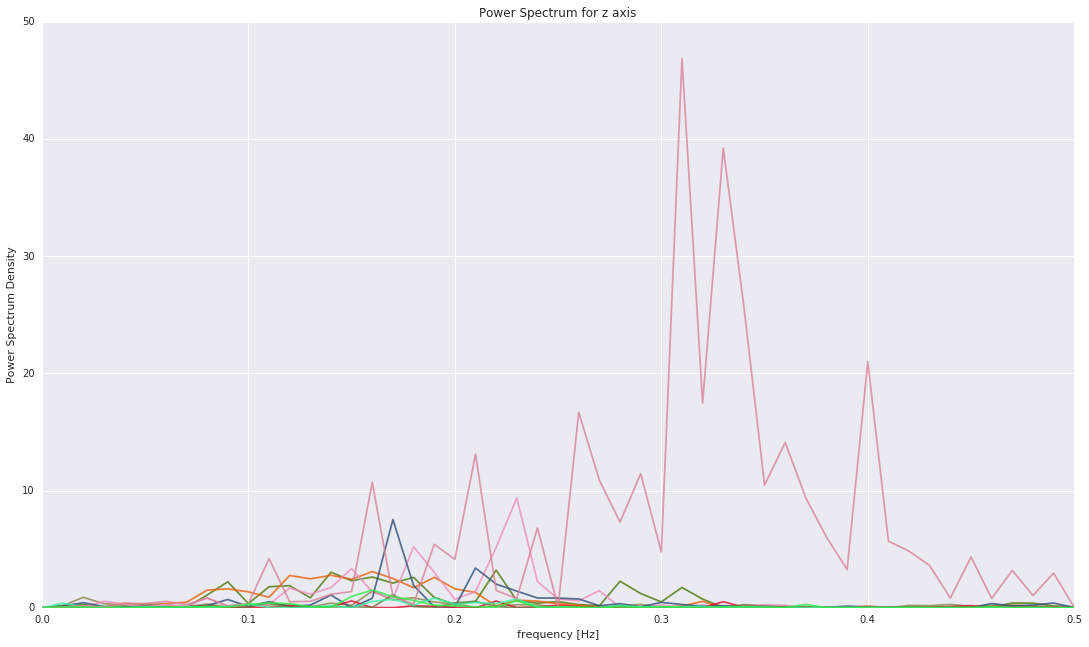

In [7]:
for color, i in zip(colors, indices):
    f, Pxx_den = signal.periodogram(readings['num_accel_' + axis][i][0:100])
    plt.plot(f, Pxx_den, color=color, alpha=0.8)
    plt.title('Power Spectrum for ' + axis + ' axis')
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power Spectrum Density')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

Justification for Cycling


What is Chi Hack Night
Ethos: empower cyclists and provide open data and tools 
to improve the urban cycling experience
Collective of civically-minded hackers who meet at the Merch Mart

Obstacles to Cycling
Congested roads
No bicycle lanes
Icy bicycle lanes
Potholes/divots in road/cracked pavement
Road closings

Pain Points
Western and Ashland versus Damen
Open Grate Bridges


Personalized Bicycle Routing
Mark up OSM with relevant information
Collect Surface Quality Data (Project Pavement)
Collect Subjective Experience (Ride-Report and Stress Map)
Integrate all of these data sources with OSRM and Leaflet-Routing-Machine

Project Pavement


Ride-Report

OSRM

Policy Implications
Show bike equity
Talk about how usability score could determine bicycle deserts


Future Directions

Ride Report
Evan and William

Michael Hassin- iOS and rails app
Steven Vance - data guy and bicycle outreach expert
Nate Hutcheson - project management
Joshua Shin - Android App (give him a job!)



Appendix and Cutting Room Floor

# Pain Points
https://www.google.com/maps/dir/4015+N+Avers+Ave,+Chicago,+IL+60618,+USA/41.9450308,-87.6547654/@41.9539148,-87.7068186,14z/am=t/data=!3m1!4b1!4m9!4m8!1m5!1m1!1s0x880fcdb8e1bb9bb9:0x68f076f1528bf96a!2m2!1d-87.7236269!2d41.954289!1m0!3e1
![img](../dat/pix_for_presentation/ambiguous_home_to_wrigleyville_google_maps.png)

# We want more people on bicycles

![img](http://www.trbimg.com/img-554cfddb/turbine/redeye-school-bike-clubs-bloomingdale-trail-20150508)



# Congested Roads

![img](http://farm8.staticflickr.com/7397/8724364789_3b55b4c2fe_z.jpg)

# Unprotected (or absent!) bike lanes

![img](http://3.bp.blogspot.com/-_Helgvgc7rw/UiTRDVnChzI/AAAAAAAACds/Xsn-x82at3Q/s1600/Ashland.JPG)